# 1 - Load in the data

In [60]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [52]:
#Read Data from csv
#Encoding used because csv contains some invalid characters
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
#drop unncessary columns, clean up
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)


# Rename columns to something better

In [53]:
df.columns = ['labels','data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
#Create binary labels i.e. 0 for ham and 1 for spam
#Scikit learn handles this but it's always better
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
Y = df['b_labels'].as_matrix()

In [68]:
#try multiple ways of calculating features
#Tfidf doesn't give good result than CountVectorizer
#tfidf = TfidfVectorizer(decode_error='ignore')
#X = tfidf.fit_transform(df['data'])

count_vectorizer = CountVectorizer(decode_error='ignore')
X = count_vectorizer.fit_transform(df['data'])


In [69]:
#Split up data:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

In [70]:
#Create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score is:", model.score(Xtrain, Ytrain))
print("test score is:", model.score(Xtest, Ytest))


train score is: 0.993302973479775
test score is: 0.9809679173463839


# Visualize the data

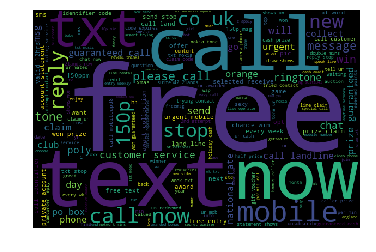

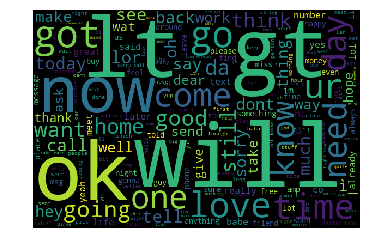

In [78]:
def visual(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
#Calling the function:
visual('spam')
visual('ham')

In [73]:
# to see what's getting wrong
df['predictions'] = model.predict(X)

In [75]:
#Things that should be in spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] ==1)]['data']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
For sale - arsenal dartboard. Good condition but no doubles or trebles!
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
More people are dogging in your area now. Call 0909

In [77]:
# Messages that should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

Nutter. Cutter. Ctter. Cttergg. Cttargg. Ctargg. Ctagg. ie you
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Yalru lyfu astne chikku.. Bt innu mundhe lyf ali halla ke bilo (marriage)program edhae, so lyf is nt yet ovr chikku..ali vargu lyfu meow meow:-D
Host-based IDPS for linux systems.
Audrie lousy autocorrect
V-aluable. A-ffectionate. L-oveable. E-ternal. N-oble. T-ruthful. I-ntimate. N-atural. E-namous. Happy \VALENTINES DAY\" in advance"
\Si.como no?!listened2the plaid album-quite gd&the new air1 which is hilarious-also boughtåÓbraindanceåÓa comp.ofstuff on aphexåÕs ;abel
Madam,regret disturbance.might receive a reference check from DLF Premarica.kindly be informed.Rgds,Rakhesh,Kerala.
Ultimately tor motive tui achieve korli.
staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
\CHEERS U TEX MECAUSE U WEREBORED! YEAH OKDEN HUNNY R UIN WK SAT?SOUNDåÕS LIKEYOUR HAV